# Imports

In [2380]:
import matplotlib.pyplot as plt
import numpy as np

In [2381]:
material = "dura"

In [2382]:
def printMeaningful(value, sigma=0.0):
    tennage = 0
    if sigma == 0:
        sigma = value
    while sigma < 1:
        tennage -= 1
        sigma *= 10
        value *= 10
    while sigma > 10:
        tennage += 1
        sigma /= 10
        value /= 10
    print( "({:.1f} \pm {:.1f}) \cdot 10^{}{}{}".format(value, sigma, "{", tennage, "}"))

In [2383]:
printMeaningful(0.2)

(2.0 \pm 2.0) \cdot 10^{-1}


# Inputs

## frequency

### Inputs

In [2384]:
N = []
f = []

with open(f"frequencies/{material}", "r") as file:
    print(file.readline())
    instrum_f = float(file.readline().strip())
    print(file.readline())
    for line in file:
        temp = line.strip().split()
        N.append(int(temp[0]))
        f.append(float(temp[1]))
    N = np.array(N)
    f = np.array(f)

instrum_f, ÐºÐ“Ñ†

n	fÐ¸Ð·Ð¼, ÐºÐ“Ñ†



In [2385]:
N

array([1, 2, 3, 4, 5, 6, 7, 8])

In [2386]:
f

array([ 4.2534,  8.5141, 12.7593, 17.0259, 21.2625, 25.5155, 29.7458,
       33.976 ])

### Table

In [2387]:
for i in range(len(N)):
    print("\t\t\hline\n\t\t", end = "")
    print("{}&{}\\\\".format(N[i], f[i]))

		\hline
		1&4.2534\\
		\hline
		2&8.5141\\
		\hline
		3&12.7593\\
		\hline
		4&17.0259\\
		\hline
		5&21.2625\\
		\hline
		6&25.5155\\
		\hline
		7&29.7458\\
		\hline
		8&33.976\\


### Units

In [2388]:
f *= 1000 # kHz -> Hz
instrum_f *= 1000 # kHz -> Hz

In [2389]:
f, instrum_f

(array([ 4253.4,  8514.1, 12759.3, 17025.9, 21262.5, 25515.5, 29745.8,
        33976. ]),
 0.1)

## Sample

### Input

In [2390]:
sample_d = []
with open(f"samples/{material}", "r") as file:
    print(file.readline())
    sample_L, sigma_samle_L = (float(i) for i in file.readline().strip().split())
    print(file.readline())
    m, sigma_m = (float(i) for i in file.readline().strip().split())
    print(file.readline())
    instrum_sample_d = (float(file.readline().strip()))
    print(file.readline())
    for line in file:
        sample_d.append(float(line.strip()))
    sample_d = np.array(sample_d)

L sigma_L

m sigma_m

sigma_d

d



In [2391]:
sample_d

array([12.03, 12.02, 12.11, 12.24, 12.26])

In [2392]:
sigma_sample_d = (1/(sample_d.size * (sample_d.size-1)) * np.sum((sample_d - np.mean(sample_d))**2))**0.5

In [2393]:
printMeaningful(np.mean(sample_d), sigma_sample_d)

(1213.2 \pm 5.1) \cdot 10^{-2}


In [2394]:
sigma_sample_d = (instrum_sample_d**2 + sigma_sample_d**2)**0.5

In [2395]:
printMeaningful(np.mean(sample_d), sigma_sample_d)

(1213.2 \pm 5.2) \cdot 10^{-2}


### Table

### Units

In [2396]:
sample_d /= 1000 # mm -> m 
sigma_sample_d /= 1000 # mm -> m 
instrum_sample_d /= 1000 # mm -> m 
sample_L /= 1000 # mm -> m 
sigma_samle_L /= 1000 # mm -> m
m /= 1000 # g -> kg
sigma_m /= 1000 # g -> kg


In [2397]:
printMeaningful(m, sigma_m)

(13228.0 \pm 1.0) \cdot 10^{-6}


## Bar

### Input

In [2398]:
d = []
with open(f"bar_sizes/{material}", "r") as file:
    print(file.readline())
    L, sigma_L = (float(i) for i in file.readline().strip().split())
    print(file.readline())
    instrum_d = (float(file.readline().strip()))
    print(file.readline())
    for line in file:
        d.append(float(line.strip()))
    d = np.array(d)

L sigma_L

sigma_d

d



In [2399]:
d

array([11.87, 11.74, 11.73, 11.75, 11.74])

### Table

In [2400]:
for i in d:
  print("\t\t\hline\n\t\t", end="")
  print(f"{i}&")

		\hline
		11.87&
		\hline
		11.74&
		\hline
		11.73&
		\hline
		11.75&
		\hline
		11.74&


In [2401]:
sigma_d = (1/(d.size * (d.size-1)) * np.sum((d - np.mean(d))**2))**0.5

In [2402]:
printMeaningful(np.mean(d), sigma_d)

(1176.6 \pm 2.6) \cdot 10^{-2}


In [2403]:
sigma_d = (instrum_d**2 + sigma_d**2)**0.5

In [2404]:
printMeaningful(np.mean(d), sigma_d)

(1176.6 \pm 2.8) \cdot 10^{-2}


### Units

In [2405]:
L /= 1000
sigma_L /= 1000
d /= 1000
instrum_d /= 1000

# Speed of sound

Permutations

$y = f\\$
$x = n\\$
$y = kx + b\\$

In [2406]:
y = f
x = N

mean_xy = np.mean(x * y)
mean_x = np.mean(x)
mean_x2 = np.mean(x**2)
mean_y = np.mean(y)
mean_y2 = np.mean(y**2)

In [2407]:
k = (mean_xy - mean_x*mean_y)/(mean_x2 - mean_x**2)
k

4246.689285714285

In [2408]:
random_k = (1/N.size)**0.5 * ((mean_y2-mean_y**2)/(mean_x2-mean_x**2)-k**2)**0.5


In [2409]:
printMeaningful(k, random_k)

(4246.7 \pm 1.9) \cdot 10^{0}


In [2410]:
b = mean_y - k * mean_x
b

21.460714285720314

In [2411]:
random_b = random_k * (mean_x2-mean_x**2)**0.5

In [2412]:
printMeaningful(b, random_b)

(21.5 \pm 4.2) \cdot 10^{0}


$k = \frac{2\pi N}{tm}$

graphics

In [2413]:
# xykb = {"copper": None, "steel": None, "dura": None}

In [2414]:
if material in xykb:
  xykb[material] = (x, y, k, b, random_k, random_b)

In [2415]:
xykb

{'copper': (array([1, 2, 3, 4, 5, 6]),
  array([ 3158.8,  6314.6,  9485.3, 12649.7, 15804.4, 18971.1]),
  3162.722857142859,
  -5.546666666674355,
  0.8188504738589546,
  1.3984534150525658),
 'steel': (array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
  array([ 4124.3,  8255.7, 12379.5, 16507.7, 20628. , 24750.7, 28851.7,
         32963. , 37055.3]),
  4117.221666666671,
  26.769444444416877,
  1.8950751907853545,
  4.8930631024816815),
 'dura': (array([1, 2, 3, 4, 5, 6, 7, 8]),
  array([ 4253.4,  8514.1, 12759.3, 17025.9, 21262.5, 25515.5, 29745.8,
         33976. ]),
  4246.689285714285,
  21.460714285720314,
  1.8523825785222734,
  4.244341691047898)}

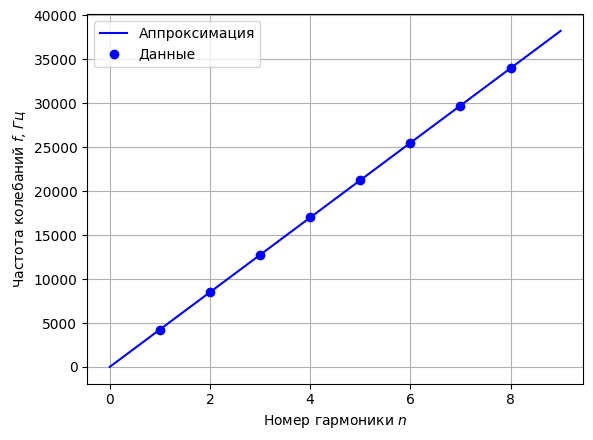

In [2416]:
plt.plot((0, 9), (0, k*9 + b), "b")
plt.plot(x, y, "bo")
plt.legend(["Аппроксимация", "Данные"])
plt.xlabel("Номер гармоники $%s$"%("n"))
plt.ylabel("Частота колебаний $%s$, $%s$"%("f", "Гц"))
plt.grid()

In [2417]:
# x, y, k, b, sigma_k, sigma_b = xykb["dura"]
# plt.plot((0, 9), (0, k*9 + b), "b")
# plt.plot(x, y, "bo")
# x, y, k, b, sigma_k, sigma_b = xykb["copper"]
# plt.plot((0, 9), (0, k*9 + b), "r")
# plt.plot(x, y, "ro")
# x, y, k, b, sigma_k, sigma_b = xykb["steel"]
# plt.plot((0, 9), (0, k*9 + b), "g")
# plt.plot(x, y, "go")
# plt.legend(["Дюраль", "_", "Медь", "_", "Сталь"])
# plt.xlabel("Номер гармоники $%s$" % ("n"))
# plt.ylabel("Частота колебаний $%s$, $%s$" % ("f", "Гц"))
# plt.grid()


In [2418]:
# for i in xykb:
#     x, y, k, b, sigma_k, sigma_b = xykb[i]
#     print("\t\t\hline\n\t\t", end = "")
#     print(f"{i}&${k:.5} \pm {sigma_k:.2}$&${b:.3} \pm {sigma_b:.2}$\\\\")

In [2419]:
u = 2 * L * k
u

5138.494035714284

In [2420]:
sigma_u = u * ((sigma_L/L)**2 + (sigma_k/k)**2)**0.5

In [2421]:
printMeaningful(u, sigma_u)

(5138.5 \pm 4.8) \cdot 10^{0}


# Density

In [2422]:
ro = (4 * m)/(np.pi * np.mean(sample_d)**2 * sample_L)

In [2423]:
sigma_ro = ro * ((sigma_m/m)**2 + 4 * (sigma_sample_d/np.mean(sample_d))**2 + (sigma_samle_L/sample_L)**2)**0.5

In [2424]:
printMeaningful(ro, sigma_ro)

(283.9 \pm 2.5) \cdot 10^{1}


# Ung

In [2425]:
E = ro * u**2

In [2426]:
sigma_E = E * ((sigma_ro/ro)**2 + 4 * (sigma_u/u)**2)**0.5

In [2427]:
printMeaningful(E, sigma_E)

(749.7 \pm 6.8) \cdot 10^{8}


In [2428]:
sigma_E/E * 100

0.9075342987251221